C:\Users\hp\AppData\Local\Temp\ipykernel_10920\2356154008.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\hp\AppData\Local\Temp\ipykernel_10920\2356154008.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Total_Revenue', data=summary, palette='viridis')


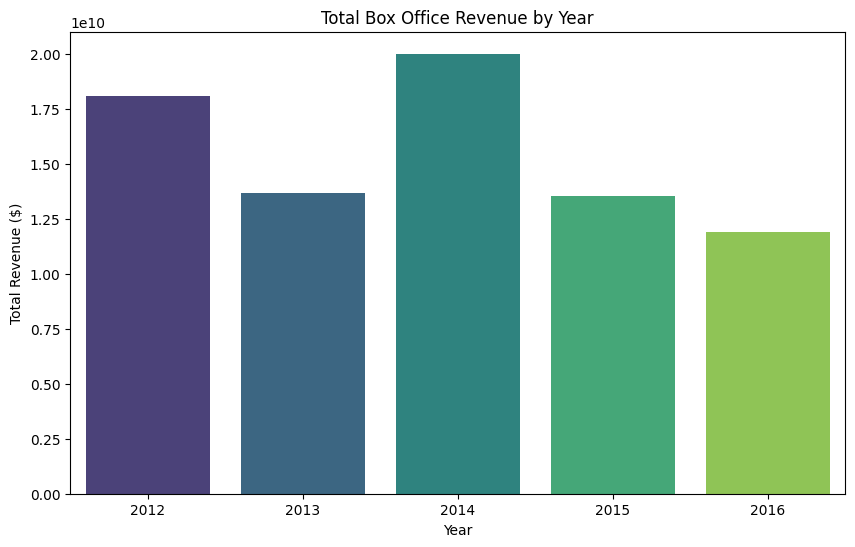

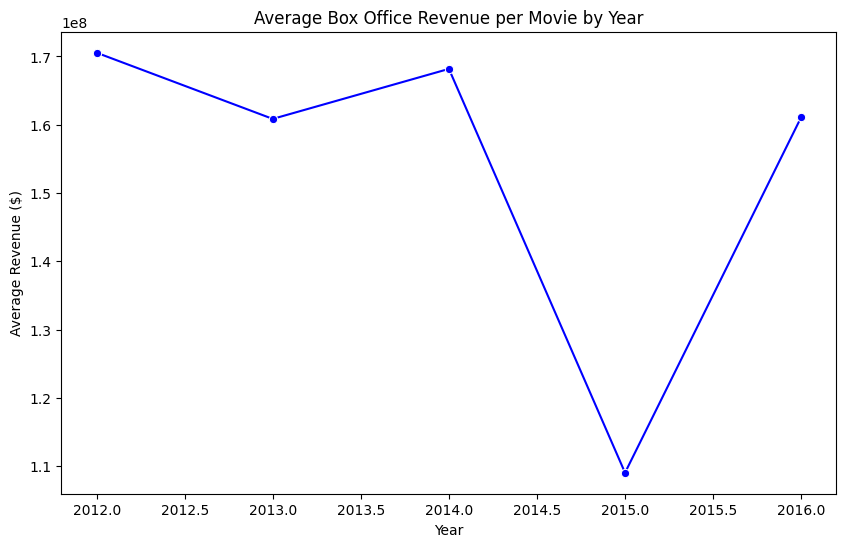

C:\Users\hp\AppData\Local\Temp\ipykernel_10920\2356154008.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Movie_Count', data=summary, palette='coolwarm')


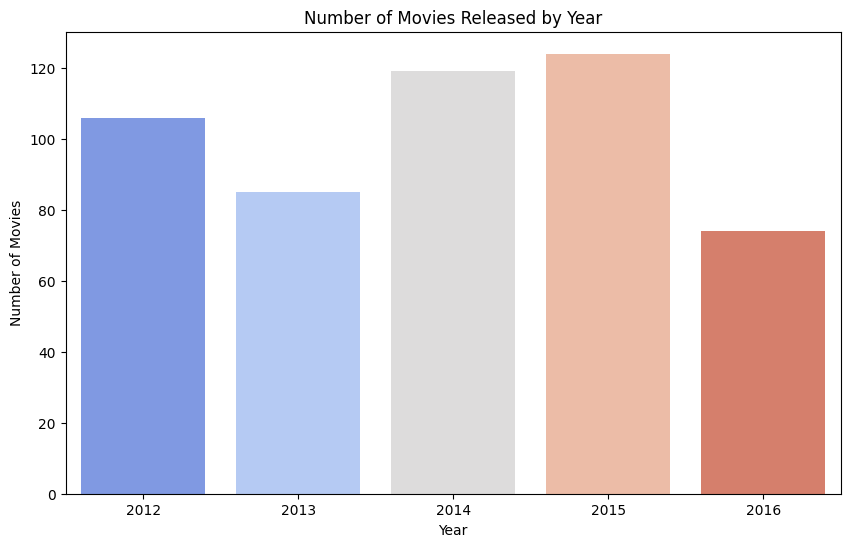

C:\Users\hp\AppData\Local\Temp\ipykernel_10920\2356154008.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Low_Revenue_Count', data=summary, palette='magma')


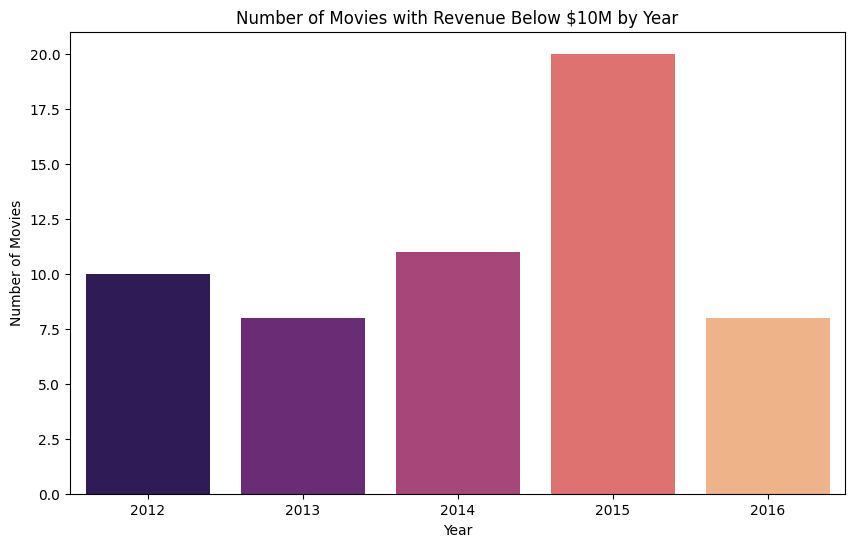

C:\Users\hp\AppData\Local\Temp\ipykernel_10920\2356154008.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Percent_Low_Revenue', data=summary, palette='plasma')


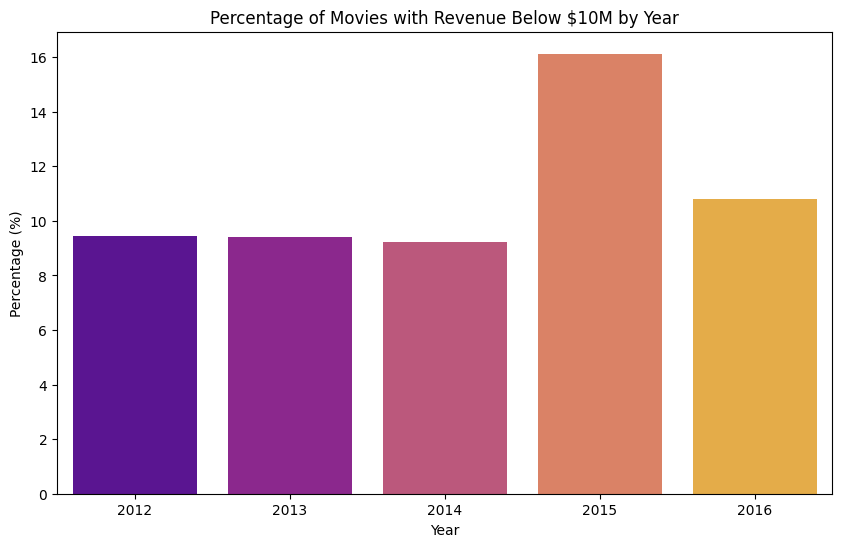

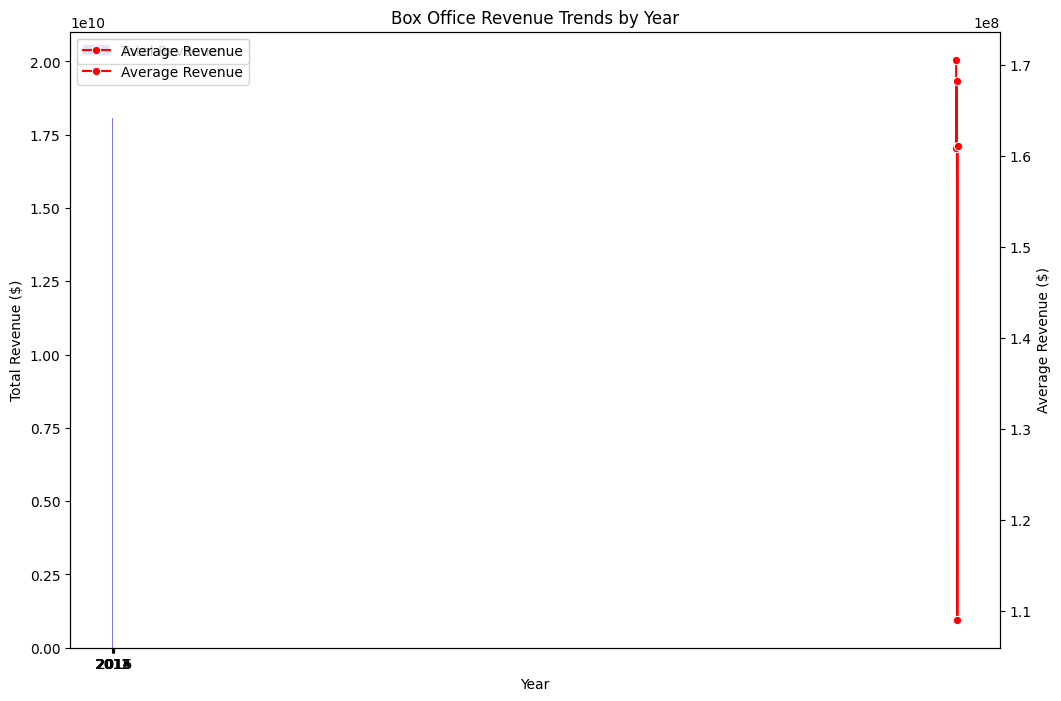

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Movie-Data.csv")

# Convert 'Release Date' to datetime and extract the year
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Year'] = df['Release Date'].dt.year

# Convert 'Revenue' column to numeric (remove '$' and ',' if present)
df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Group by year and calculate total revenue, average revenue, and count
yearly_summary = df.groupby('Year').agg(
    Total_Revenue=('Revenue', 'sum'),
    Average_Revenue=('Revenue', 'mean'),
    Movie_Count=('Revenue', 'count')
).reset_index()

# Filter movies with revenue below $10M
df_low_revenue = df[df['Revenue'] < 10000000]
low_revenue_summary = df_low_revenue.groupby('Year').agg(
    Total_Low_Revenue=('Revenue', 'sum'),
    Average_Low_Revenue=('Revenue', 'mean'),
    Low_Revenue_Count=('Revenue', 'count')
).reset_index()

# Merge the two summaries
summary = pd.merge(yearly_summary, low_revenue_summary, on='Year', how='left')
summary['Percent_Low_Revenue'] = (summary['Low_Revenue_Count'] / summary['Movie_Count']) * 100

# Visualizations
# 1. Total Revenue by Year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total_Revenue', data=summary, palette='viridis')
plt.title('Total Box Office Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue ($)')
plt.savefig('Average_Revenue_by_Year.png')  # Save the plot
plt.show()

# 2. Average Revenue per Movie by Year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Average_Revenue', data=summary, marker='o', color='blue')
plt.title('Average Box Office Revenue per Movie by Year')
plt.xlabel('Year')
plt.ylabel('Average Revenue ($)')
plt.savefig('Average_Revenue_per Movie by Year.png')  # Save the plot
plt.show()

# 3. Number of Movies Released by Year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Movie_Count', data=summary, palette='coolwarm')
plt.title('Number of Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.savefig('Number of Movies Released by Year.png')  # Save the plot
plt.show()

# 4. Movies with Revenue Below $10 Million
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Low_Revenue_Count', data=summary, palette='magma')
plt.title('Number of Movies with Revenue Below $10M by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.savefig('Number of Movies with Revenue Below $10M by Year.png')  # Save the plot
plt.show()

# 5. Percentage of Movies with Revenue Below $10 Million
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Percent_Low_Revenue', data=summary, palette='plasma')
plt.title('Percentage of Movies with Revenue Below $10M by Year')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.savefig('Percentage of Movies with Revenue Below $10M by Year.png')  # Save the plot
plt.show()

# 6. Combined Visualization: Revenue Trends
plt.figure(figsize=(12, 8))
ax1 = sns.barplot(x='Year', y='Total_Revenue', data=summary, color='blue', alpha=0.6, label='Total Revenue')
plt.ylabel('Total Revenue ($)')
ax2 = plt.twinx()
sns.lineplot(x='Year', y='Average_Revenue', data=summary, marker='o', color='red', ax=ax2, label='Average Revenue')
ax2.set_ylabel('Average Revenue ($)')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')
plt.title('Box Office Revenue Trends by Year')
plt.show()